In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gd

In [2]:
lin = pd.read_csv("C:/Users/La licorne/Desktop/resourceful/patient-data-anonymisation-exercise.csv",parse_dates=["BIRTHDATE","DEATHDATE"],dayfirst=True)

In [3]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PATIENT_ID         53346 non-null  object        
 1   START              53346 non-null  object        
 2   STOP               53346 non-null  object        
 3   ENCOUNTERCLASS     53346 non-null  object        
 4   DESCRIPTION        53346 non-null  object        
 5   TOTAL_CLAIM_COST   53346 non-null  float64       
 6   PAYER_COVERAGE     53346 non-null  float64       
 7   REASONDESCRIPTION  13777 non-null  object        
 8   BIRTHDATE          53346 non-null  datetime64[ns]
 9   DEATHDATE          14287 non-null  datetime64[ns]
 10  SSN                53346 non-null  object        
 11  DRIVERS            49285 non-null  object        
 12  PASSPORT           46965 non-null  object        
 13  FIRST              53346 non-null  object        
 14  LAST  

In [4]:
lin.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [5]:
lin[lin["PATIENT_ID"] == "034e9e3b-2def-4559-bb2a-7850888ae060"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
5,034e9e3b-2def-4559-bb2a-7850888ae060,2018-01-29T17:45:28Z,2018-01-29T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [6]:
gdl = gd.GeoDataFrame(lin, crs="EPSG:4326", geometry=gd.points_from_xy(lin.LON, lin.LAT))

C:\Users\La licorne\.conda\envs\lingeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Wall time: 1min 5s


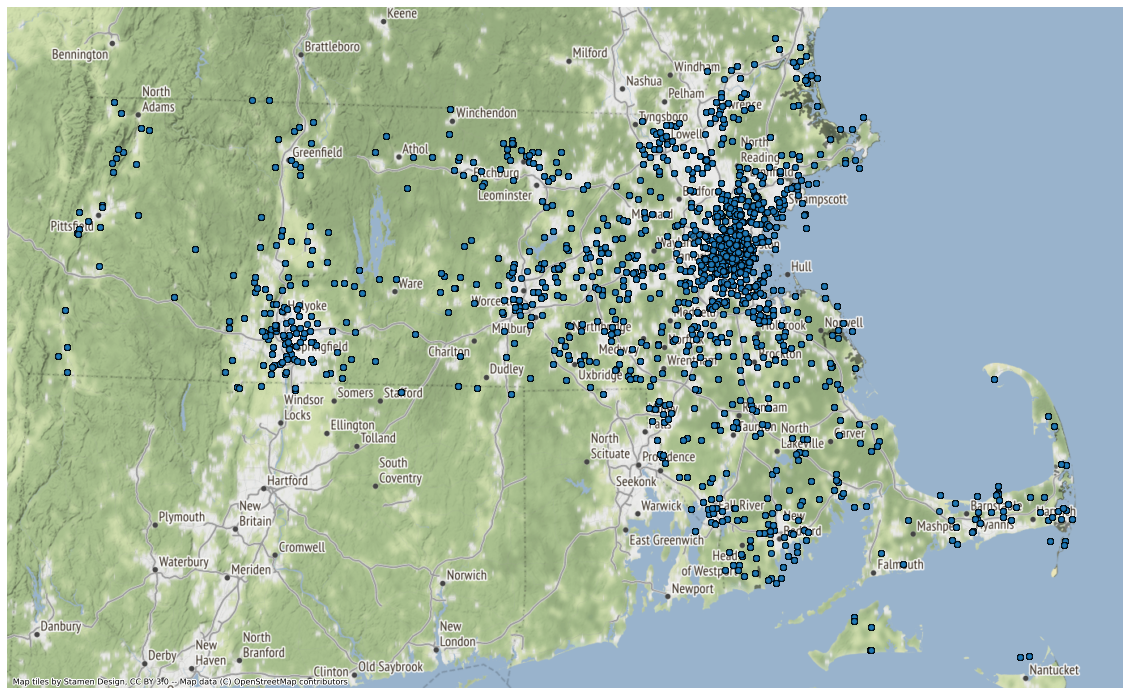

In [7]:
%%time

import contextily as ctx

# reproject
gdl = gdl.to_crs(epsg=3857)
ax = gdl.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()


In [8]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
lin.drop(suppression, axis=1, inplace=True)

In [9]:
#GENERER UN CODE D'IDENTITE UNIQUE
import uuid

str(uuid.uuid4())

'fad8bf06-4d0a-462d-a520-e58db9519028'

In [10]:
import numpy as np
sigma = 0.001 # l'écart-type, c'est-à-dire le degré de variation par rapport aux données originales que nous autorisons
mu = 1 # les données originales, considérées comme la "moyenne"

np.random.normal(mu, sigma)

0.9986613821685432

In [11]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        for _id in identities:
            self.pp[_id]
        return self.pp
    def redact(self, row):
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]
    
p = Pseudonymise()
pp_data = p.create_data(lin["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
lin[fields] = lin[fields].apply(p.redact, axis=1, result_type="expand")

C:\Users\La licorne\.conda\envs\lingeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


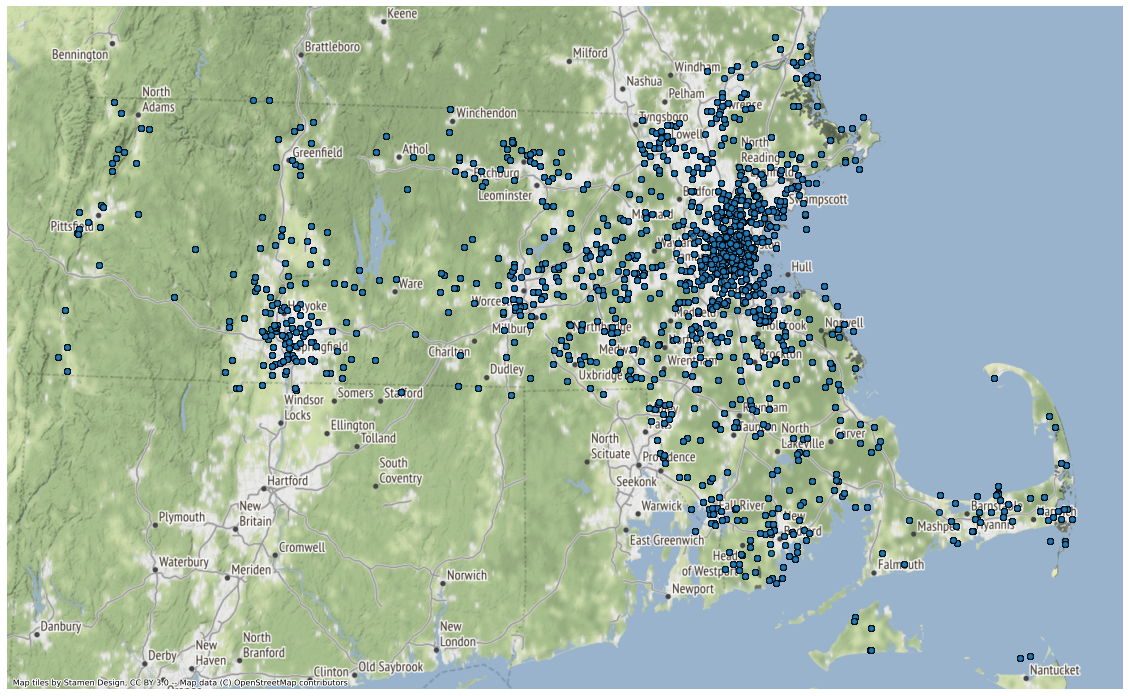

In [12]:
gdl = gd.GeoDataFrame(lin, crs="EPSG:4326", geometry=gd.points_from_xy(lin.LON, lin.LAT))
gdl = gdl.to_crs(epsg=3857)
ax = gdl.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()

# birthdate pour la generalisation et pour moins de precision j'ai remplacé la date de naissance par l'année de naissance 


In [13]:
import datetime
def annee_uniquement(value):
    return value.year

def annee_uniquement_death(value):
    return value.year

lin["DEATHDATE"]=lin["DEATHDATE"].apply(annee_uniquement_death)
lin["BIRTHDATE"]=lin["BIRTHDATE"].apply(annee_uniquement)

In [14]:
lin.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,LAT,LON,geometry
0,5cbc81fe-78a2-4c8a-a7ed-8bbe66bc8311,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.362281,-71.128174,POINT (-71.12817 42.36228)
1,5cbc81fe-78a2-4c8a-a7ed-8bbe66bc8311,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.362281,-71.128174,POINT (-71.12817 42.36228)
2,5cbc81fe-78a2-4c8a-a7ed-8bbe66bc8311,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.362281,-71.128174,POINT (-71.12817 42.36228)
3,5cbc81fe-78a2-4c8a-a7ed-8bbe66bc8311,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.362281,-71.128174,POINT (-71.12817 42.36228)
4,5cbc81fe-78a2-4c8a-a7ed-8bbe66bc8311,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.362281,-71.128174,POINT (-71.12817 42.36228)


## PASSONS A L'AGREGATION DE NOS DONNEES

In [15]:
linS = pd.read_csv("C:/Users/La licorne/Desktop/resourceful/patient-data-anonymisation-exercise.csv")

Notre objectif ici est de resoudre le probleme suivant: Pour les patients décédés, résumez la fourchette d'âge, les maladies spécifiques et le coût total et médian du traitement.

Wall time: 2min 22s


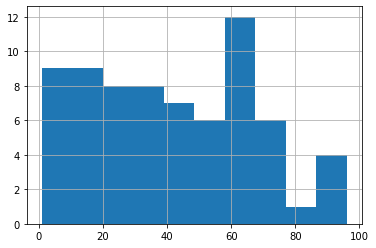

In [16]:


%%time

# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    linS[c] = linS[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
linS = linS[linS.STOP==linS.DEATHDATE]
linS.sort_values(by="STOP", inplace=True)
linS.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
linS["DEATHAGE"] = linS.DEATHDATE.apply(lambda x: x.year) - linS.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
linS["DEATHAGE"].hist(bins=10)

Créons un dataframe avec les champs suivants :

- Les âges répartis dans les 10 fourchettes ;
- Comptage des raisons spécifiques de la visite à l'hôpital (à partir de la DESCRIPTION) pour chaque tranche d'âge, et décider de la manière de présenter cela ;
- Total de tous les coûts de la demande pour chaque tranche d'âge ;
- Médiane de tous les coûts des demandes de remboursement pour chaque tranche d'âge

In [17]:
linS.shape

(70, 29)

In [18]:
linS["DEATHAGE_classe"]= pd.cut(linS["DEATHAGE"], bins=[1,10,20,30,40,50,60,70,80,90,100],include_lowest = True)
linS["DEATHAGE_classe"].head()

17464     (10.0, 20.0]
6574     (0.999, 10.0]
39451     (10.0, 20.0]
52548    (0.999, 10.0]
21413     (20.0, 30.0]
Name: DEATHAGE_classe, dtype: category
Categories (10, interval[float64]): [(0.999, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0] < (90.0, 100.0]]

In [19]:
linS.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,DEATHAGE,DEATHAGE_classe
17464,67156a1d-2e86-42e0-a81c-6ce3af24aca4,1926-03-05,1926-03-05,wellness,Death Certification,129.16,0.00,NaN,1913-05-30,1926-03-05,...,Boylston Massachusetts US,628 Welch Trafficway Suite 18,Boston,Massachusetts,Suffolk County,2163.0,42.205429,-71.126814,13,"(10.0, 20.0]"
6574,24a7b5ac-a573-4469-be04-6f02673cd157,1927-07-08,1927-07-08,wellness,Death Certification,129.16,0.00,NaN,1923-06-22,1927-07-08,...,West Springfield Massachusetts US,263 Cummings Landing Apt 63,Brookline,Massachusetts,Norfolk County,NaN,42.353288,-71.091628,4,"(0.999, 10.0]"
39451,344de08b-bae0-4d79-b89e-a2b6204e1a21,1958-01-03,1958-01-03,wellness,Death Certification,129.16,0.00,NaN,1941-02-14,1958-01-03,...,Southbridge Massachusetts US,449 Shields Extension Unit 55,Hanover,Massachusetts,Plymouth County,NaN,42.082996,-70.826976,17,"(10.0, 20.0]"
52548,b940dd35-39e3-49d9-918a-316db1e223e3,1962-12-29,1962-12-29,wellness,Death Certification,129.16,0.00,NaN,1952-01-05,1962-12-29,...,New Bedford Massachusetts US,281 Walter Harbor Suite 62,Westport,Massachusetts,Bristol County,NaN,41.599499,-71.066024,10,"(0.999, 10.0]"
21413,fd1e9a6d-5b50-4a6f-bd61-c884ab89f5c6,1967-01-07,1967-01-07,emergency,Cardiac Arrest,129.16,69.16,NaN,1942-05-23,1967-01-07,...,Brockton Massachusetts US,199 Heathcote Skyway Suite 70,Chatham,Massachusetts,Barnstable County,2633.0,41.693682,-70.010983,25,"(20.0, 30.0]"


In [20]:
LIN=linS.groupby("DEATHAGE_classe")["DESCRIPTION"].agg(["value_counts"])
LIN

value_counts
DEATHAGE_classe DESCRIPTION                                             
(0.999, 10.0]   Death Certification                                    8
                Emergency room admission (procedure)                   1
(10.0, 20.0]    Death Certification                                    4
                Cardiac Arrest                                         2
                Emergency Room Admission                               2
                Myocardial Infarction                                  2
                Emergency room admission (procedure)                   1
(20.0, 30.0]    Emergency room admission (procedure)                   2
                Cardiac Arrest                                         1
                Emergency Room Admission                               1
                General examination of patient (procedure)             1
                Myocardial Infarction                                  1
(30.0, 40.0]    Myocardial Infarction                                  3
                Emergency room admission (procedure)                   2
                Cardiac Arrest                                         1
                Emergency Room Admission                               1
                General examination of patient (procedure)             1
(40.0, 50.0]    Emergency room admission (procedure)                   3
                General examination of patient (procedure)             2
                Myocardial Infarction                                  2
                Stroke                                                 1
(50.0, 60.0]    Death Certification                                    2
                Encounter for check up (procedure)                     2
                Cardiac Arrest                                         1
                Emergency Room Admission                               1
                General examination of patient (procedure)             1
                Inpatient stay (finding)                               1
                Stroke                                                 1
(60.0, 70.0]    Myocardial Infarction                                  3
                Inpatient stay (finding)                               2
                Death Certification                                    1
                Emergency room admission (procedure)                   1
                Encounter for check up (procedure)                     1
                General examination of patient (procedure)             1
                Stroke                                                 1
(70.0, 80.0]    Stroke                                                 3
                Follow-up encounter                                    1
                Myocardial Infarction                                  1
(80.0, 90.0]    Stroke                                                 1
(90.0, 100.0]   Encounter for problem (procedure)                      1
                Inpatient stay (finding)                               1
                Stroke                                                 1

In [21]:
LIN2=linS.groupby("DEATHAGE_classe")["TOTAL_CLAIM_COST"].agg(["sum","median"])
LIN2

,sum,median
DEATHAGE_classe,,
"(0.999, 10.0]",1162.44,129.16
"(10.0, 20.0]",1420.76,129.16
"(20.0, 30.0]",774.96,129.16
"(30.0, 40.0]",1033.28,129.16
"(40.0, 50.0]",1033.28,129.16
"(50.0, 60.0]",1162.44,129.16
"(60.0, 70.0]",1291.60,129.16
"(70.0, 80.0]",645.80,129.16
"(80.0, 90.0]",129.16,129.16


In [22]:
LIN3=LIN2.join(LIN)
LIN3.columns

Index(['sum', 'median', 'value_counts'], dtype='object')

In [23]:
LIN3.rename(columns={'value_counts': "Nb de personnes ayant visité l'hopital par description pour chaque tranche d'âge", 'sum': "Total de tous les coûts de la demande pour chaque tranche d'âge",'median': "Médiane de tous les coûts de la demande pour chaque tranche d'âge"}, inplace=True)
LIN3

Total de tous les coûts de la demande pour chaque tranche d'âge  \
DEATHAGE_classe DESCRIPTION                                                                                                   
(0.999, 10.0]   Death Certification                                                                   1162.44                 
                Emergency room admission (procedure)                                                  1162.44                 
(10.0, 20.0]    Death Certification                                                                   1420.76                 
                Cardiac Arrest                                                                        1420.76                 
                Emergency Room Admission                                                              1420.76                 
                Myocardial Infarction                                                                 1420.76                 
                Emergency room admission (procedure)                                                  1420.76                 
(20.0, 30.0]    Emergency room admission (procedure)                                                   774.96                 
                Cardiac Arrest                                                                         774.96                 
                Emergency Room Admission                                                               774.96                 
                General examination of patient (procedure)                                             774.96                 
                Myocardial Infarction                                                                  774.96                 
(30.0, 40.0]    Myocardial Infarction                                                                 1033.28                 
                Emergency room admission (procedure)                                                  1033.28                 
                Cardiac Arrest                                                                        1033.28                 
                Emergency Room Admission                                                              1033.28                 
                General examination of patient (procedure)                                            1033.28                 
(40.0, 50.0]    Emergency room admission (procedure)                                                  1033.28                 
                General examination of patient (procedure)                                            1033.28                 
                Myocardial Infarction                                                                 1033.28                 
                Stroke                                                                                1033.28                 
(50.0, 60.0]    Death Certification                                                                   1162.44                 
                Encounter for check up (procedure)                                                    1162.44                 
                Cardiac Arrest                                                                        1162.44                 
                Emergency Room Admission                                                              1162.44                 
                General examination of patient (procedure)                                            1162.44                 
                Inpatient stay (finding)                                                              1162.44                 
                Stroke                                                                                1162.44                 
(60.0, 70.0]    Myocardial Infarction                                                                 1291.60                 
                Inpatient stay (finding)                                                              1291.60              